# Chlorophyll parameterization

In [13]:
import numpy as np
import pandas as pd
import json
import seaborn as sns

In [14]:
def read_results(file_name : str):
    data = open(file_name)
    data = json.load(data)

    df = pd.DataFrame.from_dict(data).T
    df = df.astype({
        "tddft_energy" : float,
        "xtb_energy" : float,
        "energy_error" : float,
        "dipole_error" : float,
    })
    
    return df
    
def read_parameters():
    return

In [15]:
df = read_results("validate_2021_1_28_1629.json")
df

,tddft_energy,xtb_energy,energy_error,tddft_dipole,xtb_dipole,dipole_error
step_1_chromophore_01,0.067717,0.046135,0.021582,"[0.305422706, -2.699393089, 0.410750669]","[0.49954817681503333, -4.341006201457196, 0.32...",4.305619
step_1_chromophore_03,0.069472,0.049482,0.019990,"[0.108963122, -2.698943706, -0.009963017]","[0.20185121641497922, -3.9107879137977157, 0.3...",4.998186
step_1_chromophore_05,0.068697,0.048504,0.020193,"[-2.513556266, -0.533737752, -0.412950881]","[-3.579394893339135, -0.5182324686857972, -0.6...",3.948966
step_1_chromophore_10,0.069634,0.045300,0.024334,"[-2.223931978, -1.457271636, 0.133906067]","[1.7210763059396919, 1.1518631662945125, -0.11...",0.696390
step_1_chromophore_21,0.068427,0.045987,0.022440,"[-2.370489918, 1.339153662, -0.274851245]","[-0.36392619767522494, 0.15805550688713121, 0....",10.647962
...,...,...,...,...,...,...
step_51_chromophore_18,0.067460,0.048892,0.018568,"[0.911409223, -2.468323674, 0.705702998]","[-1.383281515591714, 3.546996889457861, -0.568...",6.603448
step_51_chromophore_19,0.068516,0.048772,0.019744,"[2.438641034, -1.102950292, -0.366831588]","[-3.7933285634769702, 1.7517545613776657, 0.18...",5.336395
step_51_chromophore_21,0.067183,0.046424,0.020759,"[2.341241721, -1.304410169, 0.394577021]","[-3.5378374944733753, 1.9840151718631414, -0.3...",3.789839
step_51_chromophore_22,0.067402,0.045931,0.021471,"[-2.726270284, -0.432155392, 0.47175026]","[-4.109243004270607, -0.5601259561475904, 0.65...",1.458379


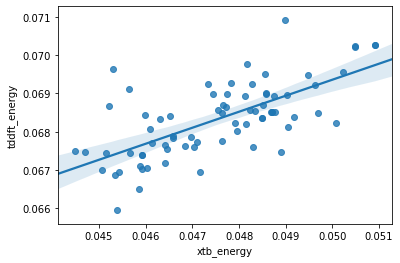

In [16]:
sns.regplot(df["xtb_energy"], df["tddft_energy"])